# 数组广播机制

In [1]:
import numpy as np

正常的加法：

In [2]:
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])
b = np.array([[ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

将 `b` 的值变成一维的 `[0,1,2]` 之后的加法：

In [3]:
b = np.array([0,1,2])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是 **numpy** 检测到 `b` 的维度与 `a` 的维度匹配，所以将 `b` 扩展为之前的形式，得到相同的形状。

对于更高维度，这样的扩展依然有效。 

如果我们再将 `a` 变成一个列向量呢？

In [4]:
a = np.array([0,10,20,30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [5]:
b

array([0, 1, 2])

In [6]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

可以看到，虽然两者的维度并不相同，但是**numpy**还是根据两者的维度，自动将它们进行扩展然后进行计算。

对于 **numpy** 来说，维度匹配当且仅当：

- 维度相同
- 有一个的维度是1

匹配会从最后一维开始进行，直到某一个的维度全部匹配为止，因此对于以下情况，**numpy** 都会进行相应的匹配：

A|B|Result
---|---|---
3d array: 256 x 256 x 3 | 1d array: 3 | 3d array: 256 x 256 x 3
4d array: 8 x 1 x 6 x 1 | 3d array: 7 x 1 x 5 | 3d array: 8 x 7 x 6 x 5
3d array: 5 x 4 x 3 | 1d array: 1 | 3d array: 5 x 4 x 3
3d array: 15 x 4 x 13 | 1d array: 15 x 1 x 13 | 3d array: 15 x 4 x 13
2d array: 4 x 1 | 1d array: 3 | 2d array: 4 x 3

匹配成功后，**numpy** 会进行运算得到相应的结果。

当然，如果相应的维度不匹配，那么**numpy**会报错：

In [7]:
a = np.array([0,10,20,30])
a.shape

(4,)

In [8]:
b.shape

(3,)

In [9]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

将 `a` 转换为列向量，还是可以计算出结果：

In [10]:
a[:, np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 例子

In [11]:
x = np.linspace(-.5,.5, 21)
x

array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ])

In [12]:
y = x[:, np.newaxis]
y

array([[-0.5 ],
       [-0.45],
       [-0.4 ],
       [-0.35],
       [-0.3 ],
       [-0.25],
       [-0.2 ],
       [-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 0.3 ],
       [ 0.35],
       [ 0.4 ],
       [ 0.45],
       [ 0.5 ]])

In [13]:
x.shape

(21,)

In [14]:
y.shape

(21, 1)

先形成一个 21 乘 21 的网格，再计算网格到原点的距离：

In [15]:
radius = np.sqrt(x ** 2 + y ** 2)

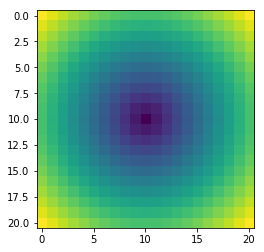

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)